In [43]:
import pandas as pd
import plotly.express as px
import json
from glob import glob

a = None


def get_state_of_destination(json_path: str) -> pd.DataFrame:
    try:
        with open(json_path, "r") as fin:
            data = json.load(fin)
        state_of_destinations = data["sod"]["destStates"]
        # name starts august 5th,
        raw_df = pd.DataFrame.from_records(state_of_destinations)
        raw_df["Date"] = pd.to_datetime(data["sod"]["currentTimestamp"], unit="s")
        raw_df["autopool_address"] = data["poolAddress"]
        raw_df["json_name"] = json_path

        return raw_df
    except Exception as e:

        print(json_path, e)
        return pd.DataFrame()


paths = glob("../fetched_data/*")
raw_df = pd.concat([get_state_of_destination(p) for p in paths])
raw_df["autopool_address"].value_counts()

../fetched_data/rebalance_records.json Expecting value: line 1 column 1 (char 0)
../fetched_data/rebalance_plan.json 'sod'
../fetched_data/rebalance_plan (18).json 'sod'


autopool_address
                                              4375
0x49C4719EaCc746b87703F964F09C22751F397BA0    3342
0x72cf6d7C85FfD73F18a83989E7BA8C1c30211b73     112
Name: count, dtype: int64

In [ ]:
#  'sodOnly': True, -> No proposed rebalance
# 'sodOnly': True, -> Yes proposed rebalance

In [48]:
with open("../fetched_data/rebalance_plan_1723339958_0x72cf6d7C85FfD73F18a83989E7BA8C1c30211b73.json", "r") as fin:
    data = json.load(fin)
    # pool address can be empty is there is no destination plan
data["date"]

{'timestamp': 1723339958,
 'sodOnly': True,
 'chainId': '1',
 'solverAddress': '0x2C26808b567BA224652f4eB20D45df4bccC29470',
 'poolAddress': '',
 'destinationOut': '',
 'tokenOut': '',
 'amountOut': '',
 'amountOutETH': '',
 'destinationIn': '',
 'tokenIn': '',
 'minAmountIn': '',
 'minAmountInETH': '',
 'steps': [],
 'sod': {'currentTimestamp': 1723339958,
  'destStates': [{'snapshotTimestamp': 0,
    'name': 'Tokemak-Wrapped Ether-Balancer stETH Stable Pool',
    'address': '0x38e73E98d2038FafdC847F13dd9100732383B6F2',
    'poolType': 'balMetaStable',
    'pool': '0x32296969Ef14EB0c6d29669C550D4a0449130230',
    'underlying': '0x32296969Ef14EB0c6d29669C550D4a0449130230',
    'underlyingTokens': ['0x7f39C581F595B53c5cb19bD0b3f8dA6c935E2Ca0',
     '0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2'],
    'underlyingTokenAmounts': [268498489174720994753, 308698409307532091857],
    'underlyingReserves': [315538836082128422734, 308698409307532091857],
    'totalAprIn': 0.02895215156282984,
    

In [47]:
raw_df[raw_df["autopool_address"] == ""]["json_name"].values

array(['../fetched_data/rebalance_plan_1723339958_0x72cf6d7C85FfD73F18a83989E7BA8C1c30211b73.json',
       '../fetched_data/rebalance_plan_1723339958_0x72cf6d7C85FfD73F18a83989E7BA8C1c30211b73.json',
       '../fetched_data/rebalance_plan_1723339958_0x72cf6d7C85FfD73F18a83989E7BA8C1c30211b73.json',
       ...,
       '../fetched_data/rebalance_plan_1723987959_0x72cf6d7C85FfD73F18a83989E7BA8C1c30211b73.json',
       '../fetched_data/rebalance_plan_1723987959_0x72cf6d7C85FfD73F18a83989E7BA8C1c30211b73.json',
       '../fetched_data/rebalance_plan_1723987959_0x72cf6d7C85FfD73F18a83989E7BA8C1c30211b73.json'],
      dtype=object)

In [52]:
raw_df[raw_df["autopool_address"] != ""]["Date"].min()

Timestamp('2024-06-28 05:43:42')

In [53]:
raw_df[raw_df["autopool_address"] != ""]["Date"].max()

Timestamp('2024-08-17 01:32:38')

In [29]:
paths[-1]

'../fetched_data/rebalance_plan_1722287299.json'

In [30]:
with open(paths[-1], "r") as fin:
    data = json.load(fin)

data.keys()

dict_keys(['timestamp', 'sodOnly', 'chainId', 'solverAddress', 'poolAddress', 'destinationOut', 'tokenOut', 'amountOut', 'amountOutETH', 'destinationIn', 'tokenIn', 'minAmountIn', 'minAmountInETH', 'steps', 'sod'])

In [31]:
data["poolAddress"]  # poolAddress is the autopool

'0x49C4719EaCc746b87703F964F09C22751F397BA0'

In [ ]:
raw_df

In [32]:
# poolAddresses = raw_df.pivot_table(
#     columns="name", index="Date", values="poolAddress"
# ).sort_index()

# poolAddresses

KeyError: 'poolAddress'

In [ ]:
# n aug5th forward

In [11]:
latest_sod = raw_df[raw_df["Date"] == raw_df["Date"].max()].copy()
latest_sod.columns

Index(['snapshotTimestamp', 'name', 'address', 'poolType', 'pool',
       'underlying', 'underlyingTokens', 'underlyingTokenAmounts',
       'underlyingReserves', 'totalAprIn', 'totalAprOut', 'incentiveAPR',
       'destLPValue', 'discountViolationAddFlag', 'discountViolationTrim1Flag',
       'discountViolationTrim2Flag', 'ownedShares', 'totSupply', 'safePrice',
       'spotPrice', 'tokenSpotPrice', 'tokenSafePrice', 'flipFlag', 'Date'],
      dtype='object')

In [ ]:
# underlyingReserves in Eth terms, in each token, eth value in pool itself.

In [20]:
latest_sod[["name", "totalAprIn", "totalAprOut"]]  # total apr in and out, no dilution.

,name,totalAprIn,totalAprOut
0,Tokemak-Wrapped Ether-Curve.fi ETH/stETH,0.019498,0.019553
1,Tokemak-Wrapped Ether-Curve.fi Factory Pool: s...,0.022861,0.024399
2,Tokemak-Wrapped Ether-Curve.fi Factory Crypto ...,0.027714,0.028424
3,Tokemak-Wrapped Ether-osETH/rETH,0.054583,0.054583
4,Tokemak-Wrapped Ether-Curve.fi Factory Plain P...,0.026942,0.026964
5,Tokemak-Wrapped Ether-Balancer stETH Stable Pool,0.016534,0.016586
6,Tokemak-Wrapped Ether-Balancer rETH Stable Pool,0.035483,0.050077
7,Tokemak-Wrapped Ether-Curve.fi Factory Pool: E...,0.087771,0.088301
8,Tokemak-Wrapped Ether-weETH/WETH-ng,0.044976,0.045505
9,Tokemak-Wrapped Ether-Balancer rsETH / ETHx,0.030731,0.073158


In [19]:
latest_sod[
    [
        "name",
        "ownedShares",
        "totSupply",
        "underlyingTokenAmounts",
        "underlyingReserves",
        "incentiveAPR",
        "totalAprOut",
        "totalAprIn",
        "Date",
        "destLPValue",
    ]
]

,name,ownedShares,totSupply,underlyingTokenAmounts,underlyingReserves,incentiveAPR,totalAprOut,totalAprIn,Date,destLPValue
0,Tokemak-Wrapped Ether-Curve.fi ETH/stETH,0,0,"[0, 0]","[32053017709056097416229, 36054978452860982156...",0.000000e+00,0.019553,0.019498,2024-08-20 21:45:33,4.070127e+22
1,Tokemak-Wrapped Ether-Curve.fi Factory Pool: s...,0,0,"[0, 0]","[8442437875449715352039, 14393539477280800838762]",0.000000e+00,0.024399,0.022861,2024-08-20 21:45:33,2.168196e+22
2,Tokemak-Wrapped Ether-Curve.fi Factory Crypto ...,0,0,"[0, 0]","[192136005169069194451, 210973693433123288742]",0.000000e+00,0.028424,0.027714,2024-08-20 21:45:33,3.983268e+20
3,Tokemak-Wrapped Ether-osETH/rETH,0,0,"[0, 0]","[2648765041029220131216, 2732659635691775301376]",0.000000e+00,0.054583,0.054583,2024-08-20 21:45:33,0.000000e+00
4,Tokemak-Wrapped Ether-Curve.fi Factory Plain P...,0,0,"[0, 0]","[224406246608804822635, 60875711825788444781]",0.000000e+00,0.026964,0.026942,2024-08-20 21:45:33,8.278779e+19
5,Tokemak-Wrapped Ether-Balancer stETH Stable Pool,0,0,"[263658154016371617831, 306775182341078337872]","[310143702954353407752, 306775182341078337872]",0.000000e+00,0.016586,0.016534,2024-08-20 21:45:33,0.000000e+00
6,Tokemak-Wrapped Ether-Balancer rETH Stable Pool,0,0,"[6398433704475764983107, 7690691375998310174547]","[7139479440856630202282, 7690691375998310174547]",3.100955e-02,0.050077,0.035483,2024-08-20 21:45:33,1.384626e+22
7,Tokemak-Wrapped Ether-Curve.fi Factory Pool: E...,0,0,"[0, 0]","[728743301652670014069, 1457159213143158678685]",4.755062e-02,0.088301,0.087771,2024-08-20 21:45:33,1.058117e+21
8,Tokemak-Wrapped Ether-weETH/WETH-ng,0,0,"[0, 0]","[728743301652670014069, 1457159213143158678685]",0.000000e+00,0.045505,0.044976,2024-08-20 21:45:33,5.740130e+19
9,Tokemak-Wrapped Ether-Balancer rsETH / ETHx,0,0,"[1071100727801546816877, 387892866136055375252]","[1091598746603732470837, 402278377337436965715]",9.225449e-03,0.073158,0.030731,2024-08-20 21:45:33,4.014347e+20


In [23]:
totalAprOut = raw_df.pivot_table(columns="name", index="Date", values="totalAprOut").sort_index()
px.line(totalAprOut)

In [ ]:
raw_df

In [59]:
totalAprOut = raw_df.pivot_table(columns="name", index="Date", values="totalAprIn").sort_index()
px.scatter(totalAprOut)

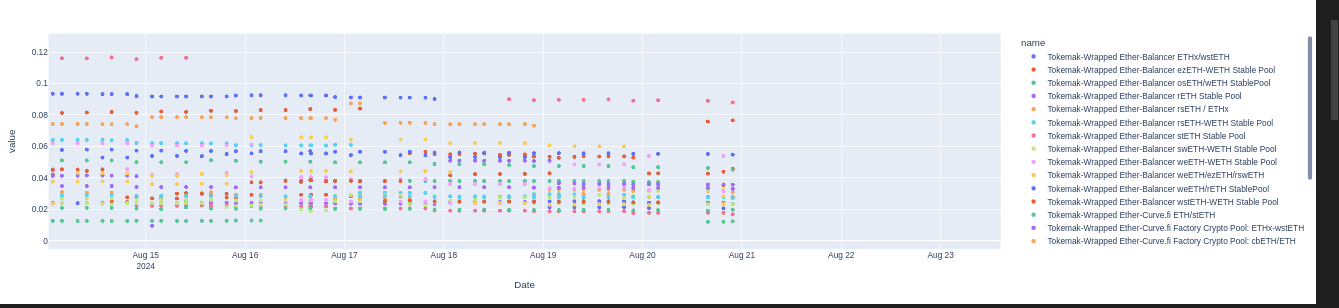

This is the expected cadence

solver uptime, calculator keeper uptime()

If a json existed

In [56]:
px.scatter(totalAprOut.resample("1D").first())

In [ ]:
# destLPValue (ETH value staked at the aura / convex contract)

In [ ]:
# underlyingTokenAmounts, quanity of each token in the pool

In [14]:
97473179019984478228 / 114658667746393425530

0.850116096199369

In [15]:
133921648282425784616 / 138888306707122311992

0.9642399094463017

What is up with underlying token amounts

what is "flipFlag" in state of destinations

Can you include Idle as a destination as well in the state of the destinations

Can you inclue autopool address as a field, in the rebalance plan

could you add the lpToken.totalSupply() for each of the pools

check if these exist first

In [2]:
raw_df.columns

Index(['snapshotTimestamp', 'name', 'address', 'poolType', 'pool',
       'underlying', 'underlyingTokens', 'underlyingReserves', 'totalAprIn',
       'totalAprOut', 'incentiveAPR', 'destLPValue',
       'discountViolationAddFlag', 'discountViolationTrim1Flag',
       'discountViolationTrim2Flag', 'ownedShares', 'totSupply', 'safePrice',
       'spotPrice', 'tokenSpotPrice', 'tokenSafePrice', 'Date', 'flipFlag'],
      dtype='object')

In [3]:
def build_lp_composition_over_time_df(raw_df: pd.DataFrame) -> pd.DataFrame:
    lp_composition_over_time_df = raw_df[["name", "Date"]].copy()
    lp_composition_over_time_df["eth_value_in_destination"] = raw_df.apply(_add_eth_value_in_destination, axis=1)
    return lp_composition_over_time_df


def _add_eth_value_in_destination(row: dict):
    return (int(row["ownedShares"]) / 1e18) * row["safePrice"]


def make_autopool_LP_composition_over_time_chart(raw_df: list[pd.DataFrame]):
    lp_composition_over_time_df = build_lp_composition_over_time_df(raw_df)
    eth_in_destination_df = lp_composition_over_time_df.pivot_table(
        columns="name", index="Date", values="eth_value_in_destination"
    ).sort_index()
    # only look at destinatios we have touched,
    # eg where at least one of the values in eth_value_in_destination is not 0
    # this is just to make the legend cleaner
    eth_in_destination_df = eth_in_destination_df.loc[:, (eth_in_destination_df != 0).any(axis=0)]
    fig = px.bar(
        eth_in_destination_df.resample("1D").ffill(),
        title="LP Composition Over Time In ETH",
        labels={"value": "ETH"},
    )
    return fig


lp_composition_over_time_fig = make_autopool_LP_composition_over_time_chart(raw_df)  # These are the weights
lp_composition_over_time_fig.show()

Does this make sense

In [15]:
def build_asset_composition_over_time_df(raw_df: pd.DataFrame) -> pd.DataFrame:
    name_time_df = raw_df[["name", "Date"]].copy()

    date_assets_owned_records = raw_df.apply(_add_eth_value_in_each_asset, axis=1)
    assets_owned_df = pd.DataFrame.from_records(date_assets_owned_records)

    return pd.concat([name_time_df, assets_owned_df], axis=0)


def _add_eth_value_in_each_asset(row: dict):
    shares_owned = int(row["ownedShares"]) / 1e18
    # this will work if we have total supply, can be backed out using destination eth value but
    # using total supply is clearer
    portion_of_pool_owned = shares_owned / (int(row["totSupply"]) / 1e18)
    portion_of_tokens_owned = {"Date": row["Date"]}

    for token, underlyingReserve, tokenSafePrice in zip(
        row["underlyingTokens"], row["underlyingReserves"], row["tokenSafePrice"]
    ):
        portion_of_tokens_owned[token] = portion_of_pool_owned * (int(underlyingReserve) / 1e18) * tokenSafePrice

    return portion_of_tokens_owned  # dict[token: eth value of this token ]


a = build_asset_composition_over_time_df(raw_df)

ZeroDivisionError: float division by zero